# 
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification- Final Assignment</font></h1>
<h3 align="center"><font size="5"> Zeynep Bölükbaşı 1.05.2024 </font></h3>

## Import the required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay



## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('LungCancer.csv')
data.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


# 1. About the Data

#### Lung cancer is a disease that occurs as a result of uncontrolled growth of cells in the lungs, and this growth can damage surrounding tissues or metastasize over time. The features in this data set allow the analysis of patient behavior and physical symptoms to predict whether a person has lung cancer using machine learning models.

#### This dataset consists of 15 features.

####  1-Gender (GENDER): Categorical data indicating the gender of the patients, represented as “M” for male and “F” for female.
####  2-Age (AGE): Numerical data representing the age of the patients.
####  3-Smoking (SMOKING): Binary categorical data indicating whether the patient smokes (2 for Yes, 1 for No).
#### 4-Yellow Fingers (YELLOW_FINGERS): Binary categorical data indicating the presence of yellow fingers (2 for Yes, 1 for No), potentially a symptom or side effect of smoking.
#### 5-Anxiety (ANXIETY): Indicates if the patient experiences anxiety (2 for Yes, 1 for No).
#### 6-Peer Pressure (PEER_PRESSURE): Reflects if peer pressure affects the patient's smoking habits (2 for Yes, 1 for No).
#### 7-Chronic Disease (CHRONIC DISEASE): Indicates the presence of any chronic diseases (2 for Yes, 1 for No).
#### 8-Fatigue (FATIGUE): Indicates the level of fatigue experienced by the patient (2 for Yes, 1 for No).
#### 9-Allergy (ALLERGY): Shows if the patient has allergies (2 for Yes, 1 for No).
#### 10-Wheezing (WHEEZING): Indicates if the patient experiences wheezing (2 for Yes, 1 for No).
#### 11-Alcohol Consuming (ALCOHOL CONSUMING): Indicates alcohol consumption patterns (2 for Yes, 1 for No).
#### 12-Coughing (COUGHING): Indicates if the patient has a cough (2 for Yes, 1 for No).
#### 13-Shortness of Breath (SHORTNESS OF BREATH): Reflects if the patient suffers from shortness of breath (2 for Yes, 1 for No).
#### 14-Swallowing Difficulty (SWALLOWING DIFFICULTY): Indicates difficulties in swallowing (2 for Yes, 1 for No).
#### 15-Chest Pain (CHEST PAIN): Indicates the presence of chest pain (2 for Yes, 1 for No).



In [7]:

data.describe().T.style.set_properties(**{"background-color": "#000000","color":"white","border": "1.5px  solid black"})

,count,mean,std,min,25%,50%,75%,max
AGE,309.000000,62.673139,8.210301,21.000000,57.000000,62.000000,69.000000,87.000000
SMOKING,309.000000,1.563107,0.496806,1.000000,1.000000,2.000000,2.000000,2.000000
YELLOW_FINGERS,309.000000,1.569579,0.495938,1.000000,1.000000,2.000000,2.000000,2.000000
ANXIETY,309.000000,1.498382,0.500808,1.000000,1.000000,1.000000,2.000000,2.000000
PEER_PRESSURE,309.000000,1.501618,0.500808,1.000000,1.000000,2.000000,2.000000,2.000000
CHRONIC DISEASE,309.000000,1.504854,0.500787,1.000000,1.000000,2.000000,2.000000,2.000000
FATIGUE,309.000000,1.673139,0.469827,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
WHEEZING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
ALCOHOL CONSUMING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.columns[data.isnull().any()] 
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

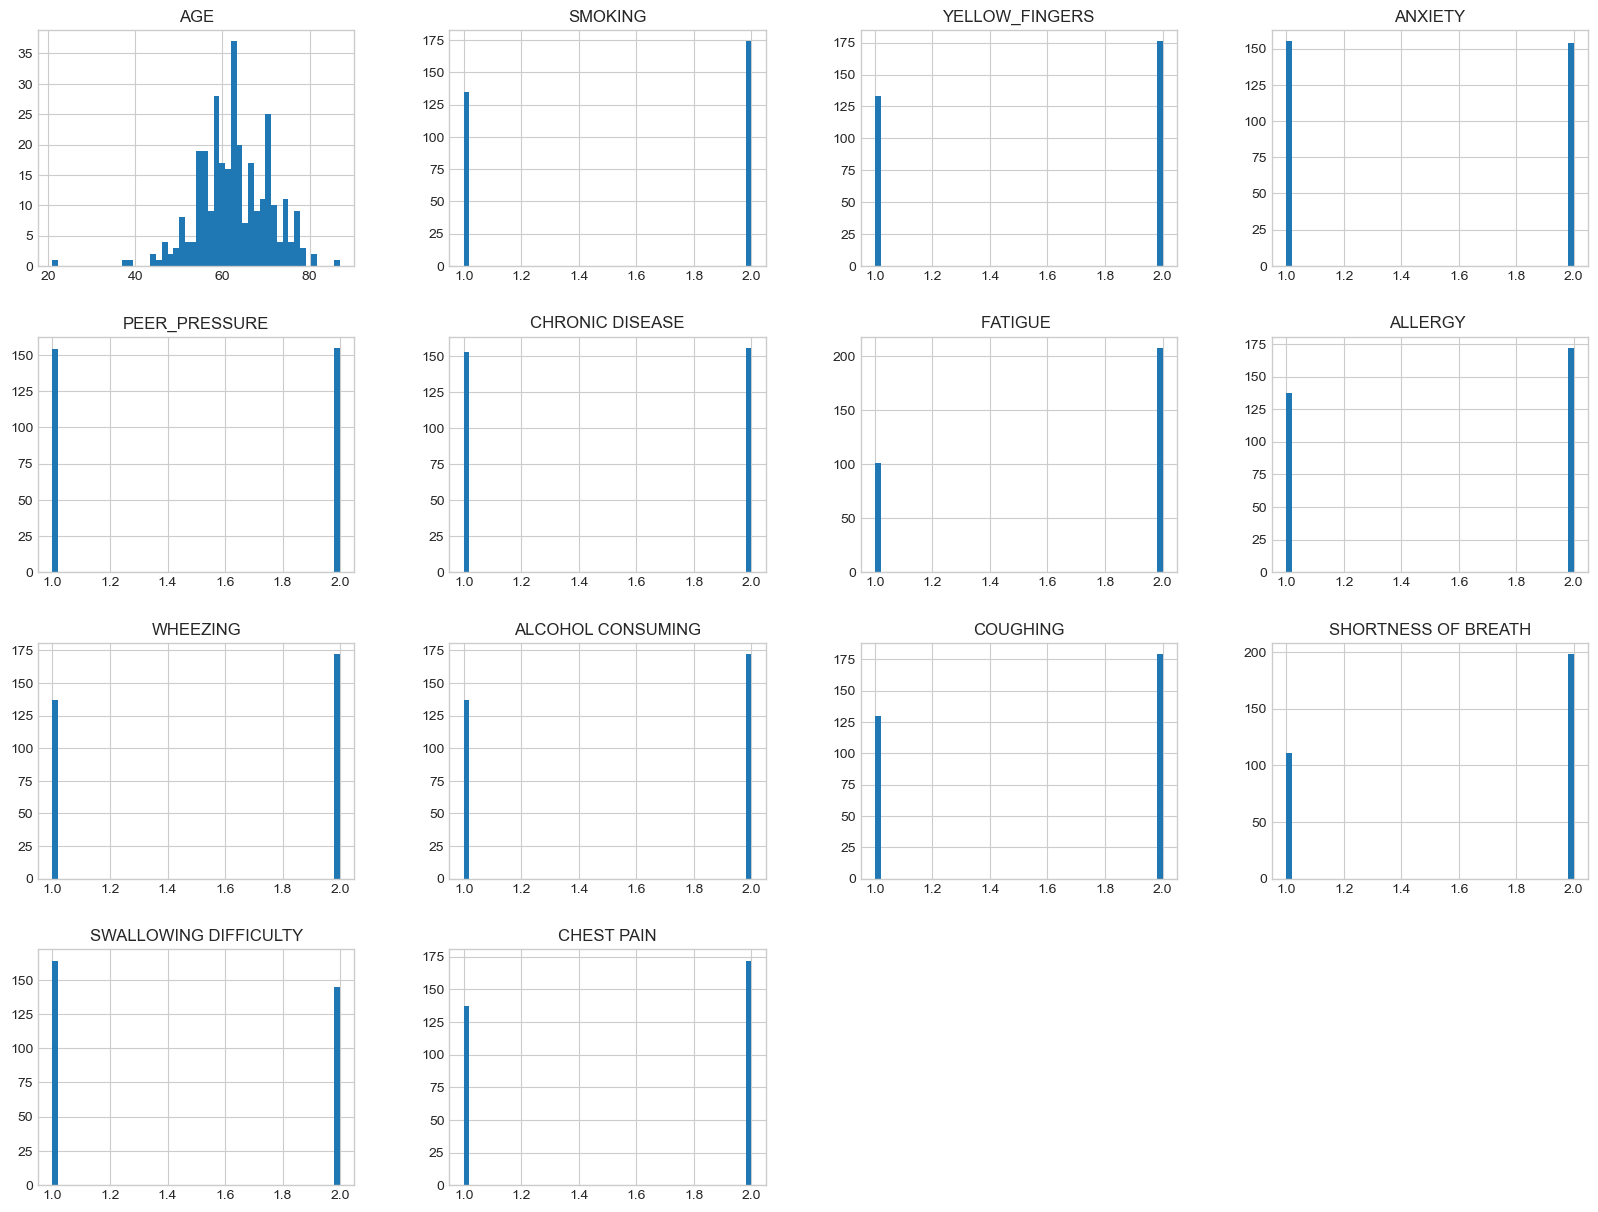

In [8]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
data['GENDER']=data['GENDER'].replace(['M', 'F'],[0,1])
data['LUNG_CANCER']=data['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

In [10]:
tmp=np.log(data['SMOKING'])

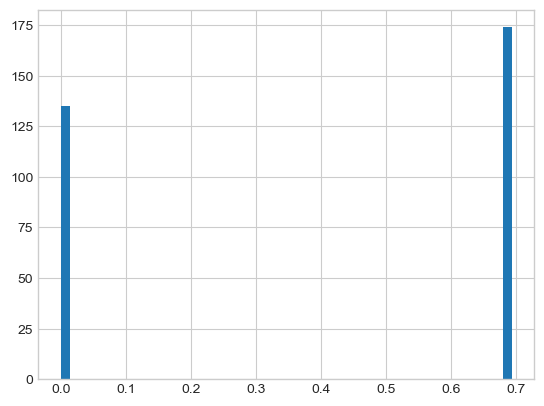

In [11]:
tmp.hist(bins=50)
plt.show()

# 2. Objectives


The main objective of this analysis is to create a prediction model that uses clinical and behavioral data to reliably diagnose lung cancer. The goal of the analysis is to give stakeholders and healthcare professionals a tool that improves early detection skills, which might result in better patient outcomes and more efficient treatment planning. In order to guarantee that actionable insights can be consistently extracted from the model outputs, this research uses machine learning to strike a compromise between predicted performance and model interpretability.

# 3. Classification Models


##  3.1 Train / Test Split Data

In [12]:
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (216, 15), (216,)
Shape of testing data : (93, 15), (93,)


## 3.2 Logistic Regression

A statistical model called logistic regression calculates the possibility of a binary result given one or more predictor variables. For binary classification tasks, it is straightforward but efficient, and it offers probabilities that are helpful for determining thresholds for decisions.



Accuracy: At 97.85%, the Logistic Regression showed excellent precision.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit the Logistic Regression model on the training data
lr = LogisticRegression()
lr.fit(x_train, y_train)
 # Predict labels for the test set
lr_pred = lr.predict(x_test) 
# Generate a classification report to evaluate the precision, recall, and F1-score
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
# Calculate the overall accuracy of the model on the test data
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
# Print the evaluation metrics
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 5  2]
 [ 0 86]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93


The Accuracy of Logistic Regression is 97.85 %


In [14]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
lr_conf = confusion_matrix(y_test, lr_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(lr_conf)


Confusion Matrix:
[[ 5  2]
 [ 0 86]]


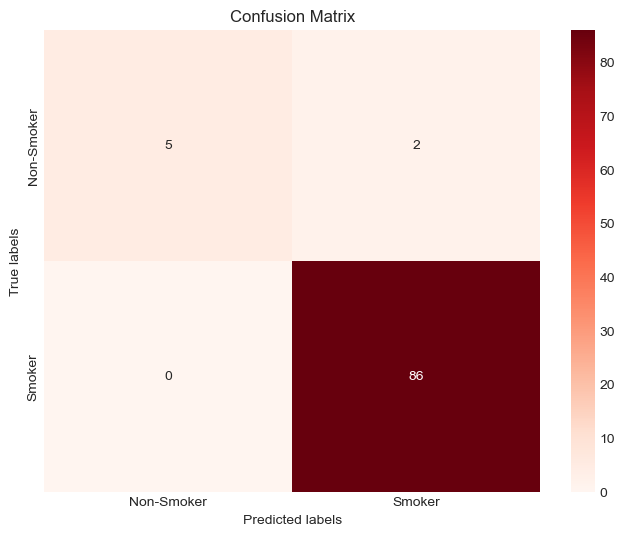

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["Non-Smoker", "Smoker"], 
            yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## 3.3 Support Vector Machine

The robust classifier known as Support Vector Machine operates by identifying the hyperplane that most effectively partitions a dataset into classes. It can do both linear and nonlinear classification, and it excels at handling high-dimensional data.
Precision: The accuracy of the SVM model was 95.7%. Its strong performance, which includes high recall and accuracy, shows that it manages the separability between the classes in your dataset well.


In [16]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
# C is the regularization parameter. The strength of the regularization is inversely proportional to C. 
# Must be strictly positive. The penalty is a squared l2 penalty.
# Gamma defines the influence of a single training example.

# Fit the SVM model on the training dataset
svm.fit(x_train, y_train)
# Predict the target values for the test dataset
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Calculate the accuracy percentage of the model
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 5  2]
 [ 2 84]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98        86

    accuracy                           0.96        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.96      0.96      0.96        93


The Accuracy of Support Vector Machine is 95.7 %


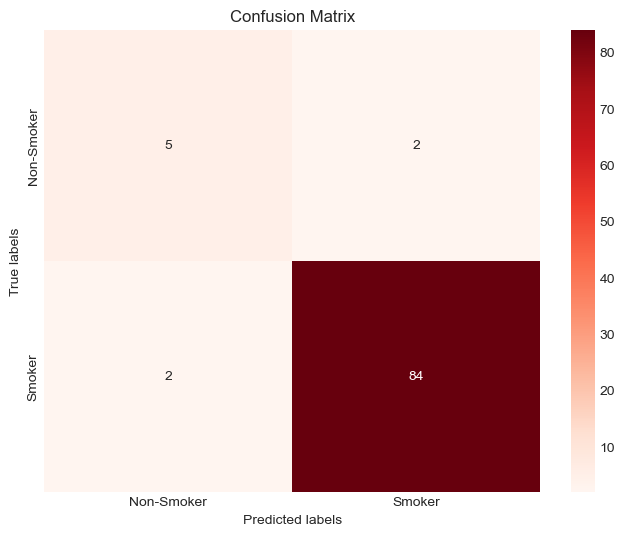

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["Non-Smoker", "Smoker"], 
            yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## 3.4 K Nearest Neighbors

A data point is categorized using the K-Nearest Neighbors algorithm according to the classification of its neighbors. By examining the 'K' nearest labeled data points and forecasting the label based on their majority vote, this simple and efficient algorithm captures the core of the data.
Accuracy: 93.55% accuracy was attained with the KNN model. As seen by its mixed accuracy and recall scores, this shows that although the model is reasonably accurate, it could have trouble with smaller classes or outliers.


In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier with a specific number of neighbors
knn = KNeighborsClassifier(n_neighbors=2)
# n_neighbors is the number of neighbors to use for kneighbors queries; in this case, 2 neighbors.
# Fit the KNN model on the training dataset
knn.fit(x_train, y_train)

# Predict the target values for the test dataset using the trained KNN model
knn_pred = knn.predict(x_test)
# Generate the confusion matrix to evaluate the accuracy of the classification
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)

# Calculate the overall accuracy of the model and round it to two decimal places.

# Print the model's performance metrics
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[ 6  1]
 [ 5 81]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.99      0.94      0.96        86

    accuracy                           0.94        93
   macro avg       0.77      0.90      0.82        93
weighted avg       0.95      0.94      0.94        93


The Accuracy of K Nearest Neighbors Classifier is 93.55 %


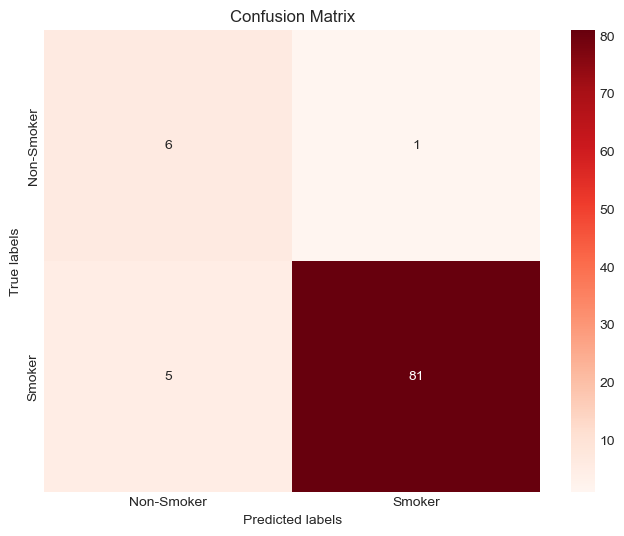

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["Non-Smoker", "Smoker"], 
            yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# 3.5 Decision Tree

A non-linear model called a decision tree creates a tree structure by dividing the data. The tree's nodes divide the data according to a predetermined feature threshold, acting as decision points that make the information easier to understand and analyze.
Accuracy: 94.62% was the accuracy of the Decision Tree model. Although it yields findings that are easily interpreted and has acceptable accuracy, if it is not adjusted or pruned appropriately, it may become overfitting.


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(x_train, y_train)  # Make sure x_train and y_train are correctly preprocessed

# Make predictions on the test data
dt_pred = dt.predict(x_test)  # Ensure x_test is correctly preprocessed
# Generate the confusion matrix
dt_conf = confusion_matrix(y_test, dt_pred)

# Generate the classification report
dt_report = classification_report(y_test, dt_pred)

# Calculate the accuracy score
dt_acc = round(accuracy_score(y_test, dt_pred) * 100, 2)

# Print the results
print(f"Confusion Matrix :\n\n{dt_conf}")
print(f"\nClassification Report :\n\n{dt_report}")
print(f"\nThe Accuracy of Decision Tree Classifier is {dt_acc} %")


Confusion Matrix :

[[ 6  1]
 [ 4 82]]

Classification Report :

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.99      0.95      0.97        86

    accuracy                           0.95        93
   macro avg       0.79      0.91      0.84        93
weighted avg       0.96      0.95      0.95        93


The Accuracy of Decision Tree Classifier is 94.62 %


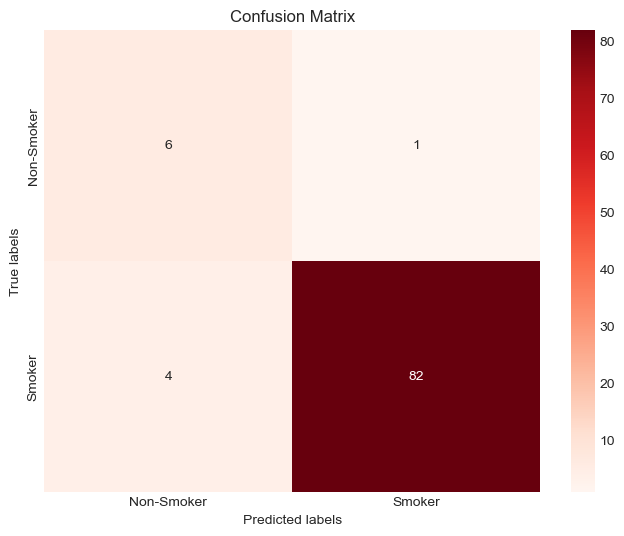

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["Non-Smoker", "Smoker"], 
            yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


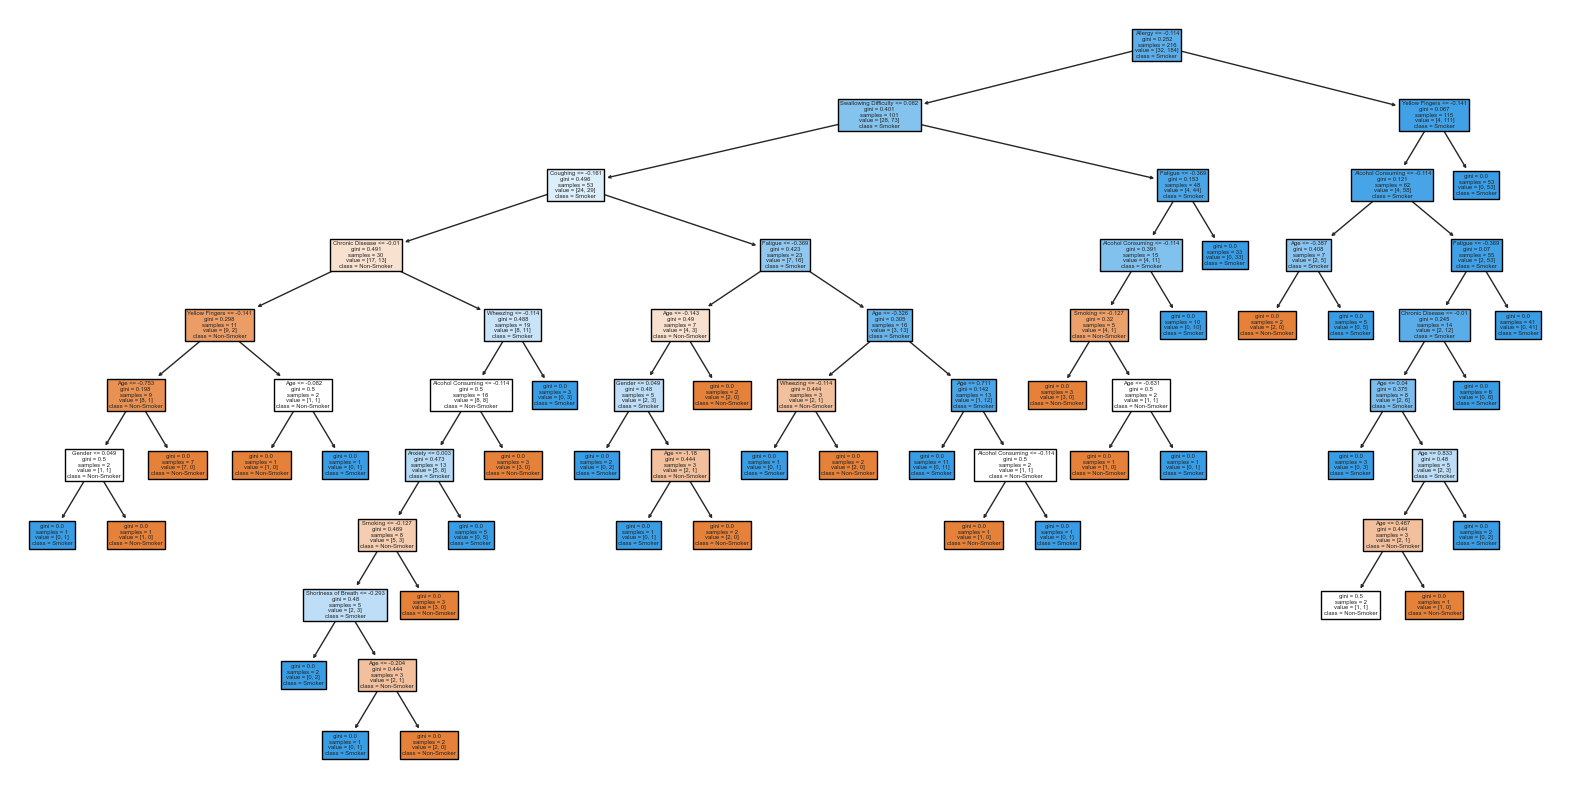

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ["Gender", "Age", "Smoking", "Yellow Fingers", "Anxiety", "Peer Pressure", 
                 "Chronic Disease", "Fatigue", "Allergy", "Wheezing", "Alcohol Consuming",
                 "Coughing", "Shortness of Breath", "Swallowing Difficulty", "Chest Pain"]

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=feature_names, class_names=["Non-Smoker", "Smoker"], filled=True)
plt.show()


## 3.6 Random Forest

During training, a large number of decision trees are built using the Random Forest ensemble learning technique, which outputs the class that is the mean of the classes of the individual trees. When it comes to single decision tree overfitting issues, this approach works really well.
Accuracy: Like logistic regression, the Random Forest model likewise obtained a high accuracy of 97.85%, demonstrating strong resilience and dependability across various subsets of your data.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees in the forest

# Train the model on the training data
rf.fit(x_train, y_train)  # Ensure x_train and y_train are properly preprocessed

# Make predictions on the test data
rf_pred = rf.predict(x_test)  # Ensure x_test is correctly preprocessed
# Generate the confusion matrix
rf_conf = confusion_matrix(y_test, rf_pred)

# Generate the classification report
rf_report = classification_report(y_test, rf_pred)

# Calculate the accuracy score
rf_acc = round(accuracy_score(y_test, rf_pred) * 100, 2)

# Print the results
print(f"Confusion Matrix :\n\n{rf_conf}")
print(f"\nClassification Report :\n\n{rf_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rf_acc} %")


Confusion Matrix :

[[ 6  1]
 [ 1 85]]

Classification Report :

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.99      0.99      0.99        86

    accuracy                           0.98        93
   macro avg       0.92      0.92      0.92        93
weighted avg       0.98      0.98      0.98        93


The Accuracy of Random Forest Classifier is 97.85 %


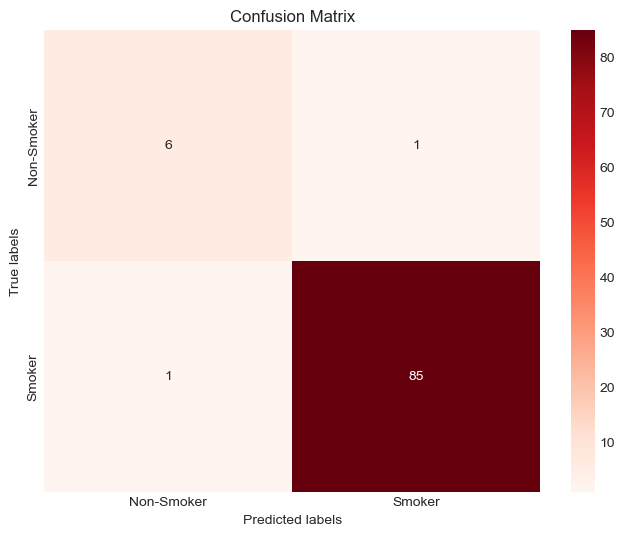

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["Non-Smoker", "Smoker"], 
            yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# 4. Insights and key findings


Numerous insightful findings about the variables influencing lung cancer prediction and the efficacy of these models were made possible by the examination of the lung cancer dataset using a variety of classification methods. Both the Random Forest and Logistic Regression models showed high accuracies of 97.85%, demonstrating their reliable predicting ability throughout the dataset. The K-Nearest Neighbors and Decision Tree models, on the other hand, revealed difficulties in predicting outcomes for smaller classes, which may indicate overfitting problems. Their respective accuracies were 93.55% and 94.62%. The significance of feature scaling is demonstrated by the fact that regular use of StandardScaler greatly enhanced model performance through data normalization. This was especially evident in the Logistic Regression and SVM models, the latter of which achieved an accuracy of 95.7%. The essential trade-offs between sensitivity and specificity were revealed by a thorough examination of model measures like accuracy and recall, with certain models performing better when handling the majority or minority classes. Furthermore, from a clinical standpoint, symptoms like chronic coughing and chest discomfort, as well as powerful predictors like smoking and age, were found to be important markers of lung cancer. Medical literature supports these characteristics and emphasizes the importance of lifestyle factors including peer pressure and alcohol usage, which have been shown to have a moderate influence on the model's predictions. Together, these discoveries deepen our knowledge of the risk factors for lung cancer and help to improve the prediction algorithms employed in medical diagnosis.



# 5. Next Steps


Several cutting-edge tactics may be used to improve the lung cancer classification models' robustness and prediction performance. First off, by exploring feature engineering in greater detail, more subtle insights may be extracted from the available data, which may lead to improved feature interactions and transformations that provide higher predicted accuracies. Furthermore, enhancing model performance by means of sophisticated hyperparameter tweaking and investigating ensemble techniques that combine predictions from many models can significantly increase stability and generalizability. By using k-fold cross-validation, performance variability caused by particular train-test splits may be reduced by confirming the models' consistency over various data subsets. More varied patient data, such as genetic markers and thorough medical histories, may be added to the dataset to improve model resilience and enable a more thorough study. To increase processing capacity and modeling capabilities, more sophisticated methods like neural networks should be investigated. These methods are particularly helpful for managing intricate patterns in big datasets. Furthermore, by emphasizing model interpretability using methods like feature significance score, important insights into the models' decision-making processes may be gained, leading to insightful clinical interpretations. The model will stay accurate and relevant over time, adjusting to new trends and discoveries in medical research, if it is regularly updated with fresh data and the feature set is reviewed.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
